In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
df=pd.read_csv("fuelcsv.csv" ,encoding='ISO-8859-1',low_memory=False)
df

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570
...,...,...,...,...,...,...,...,...,...,...,...
29518,f1_fuel_2018_12_12_0_13,12,2018,neil simpson ct #1,gas,mcf,18799.0,1.059,4.78,4.78,9.030
29519,f1_fuel_2018_12_12_1_1,12,2018,cheyenne prairie 58%,gas,mcf,806730.0,1.050,3.65,3.65,6.950
29520,f1_fuel_2018_12_12_1_10,12,2018,lange ct facility,gas,mcf,104554.0,1.060,4.77,4.77,8.990
29521,f1_fuel_2018_12_12_1_13,12,2018,wygen 3 bhp 52%,coal,ton,315945.0,16.108,3.06,14.76,1.110


In [3]:
df.columns

Index(['record_id', 'utility_id_ferc1', 'report_year', 'plant_name_ferc1',
       'fuel_type_code_pudl', 'fuel_unit', 'fuel_qty_burned',
       'fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned',
       'fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu'],
      dtype='object')

In [4]:
df.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [5]:
df['fuel_type_code_pudl'].value_counts()

gas        11486
coal        8547
oil         8064
nuclear      818
waste        441
other        167
Name: fuel_type_code_pudl, dtype: int64

In [6]:
percent_missing = df['fuel_unit'].isnull().sum() * 100 / len(df)
percent_missing

0.6096941367747181

In [7]:
df['fuel_mmbtu_per_unit'].describe()

count    29523.000000
mean         8.492111
std         10.600220
min          0.000001
25%          1.024000
50%          5.762694
75%         17.006000
max        341.260000
Name: fuel_mmbtu_per_unit, dtype: float64

In [8]:
df['fuel_qty_burned'].kurt()

651.3694501337732

In [9]:
df['fuel_qty_burned'].skew()


15.851495469109503

In [10]:
df['fuel_unit'].value_counts().describe()

count        9.000000
mean      3260.333333
std       4713.610612
min         84.000000
25%        100.000000
50%        180.000000
75%       7998.000000
max      11354.000000
Name: fuel_unit, dtype: float64

In [11]:
df.dtypes

record_id                        object
utility_id_ferc1                  int64
report_year                       int64
plant_name_ferc1                 object
fuel_type_code_pudl              object
fuel_unit                        object
fuel_qty_burned                 float64
fuel_mmbtu_per_unit             float64
fuel_cost_per_unit_burned       float64
fuel_cost_per_unit_delivered    float64
fuel_cost_per_mmbtu             float64
dtype: object

In [12]:
df.corr(method ='pearson')

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
utility_id_ferc1,1.000000,0.093323,-0.057447,-0.066946,-0.037863,-0.016414,0.006122
report_year,0.093323,1.000000,0.012952,-0.110853,0.013599,-0.014043,0.010261
fuel_qty_burned,-0.057447,0.012952,1.000000,-0.080946,-0.018535,-0.003551,-0.001896
fuel_mmbtu_per_unit,-0.066946,-0.110853,-0.080946,1.000000,-0.010034,-0.009039,-0.005884
fuel_cost_per_unit_burned,-0.037863,0.013599,-0.018535,-0.010034,1.000000,0.011007,-0.000437
fuel_cost_per_unit_delivered,-0.016414,-0.014043,-0.003551,-0.009039,0.011007,1.000000,-0.000109
fuel_cost_per_mmbtu,0.006122,0.010261,-0.001896,-0.005884,-0.000437,-0.000109,1.000000


<AxesSubplot:>

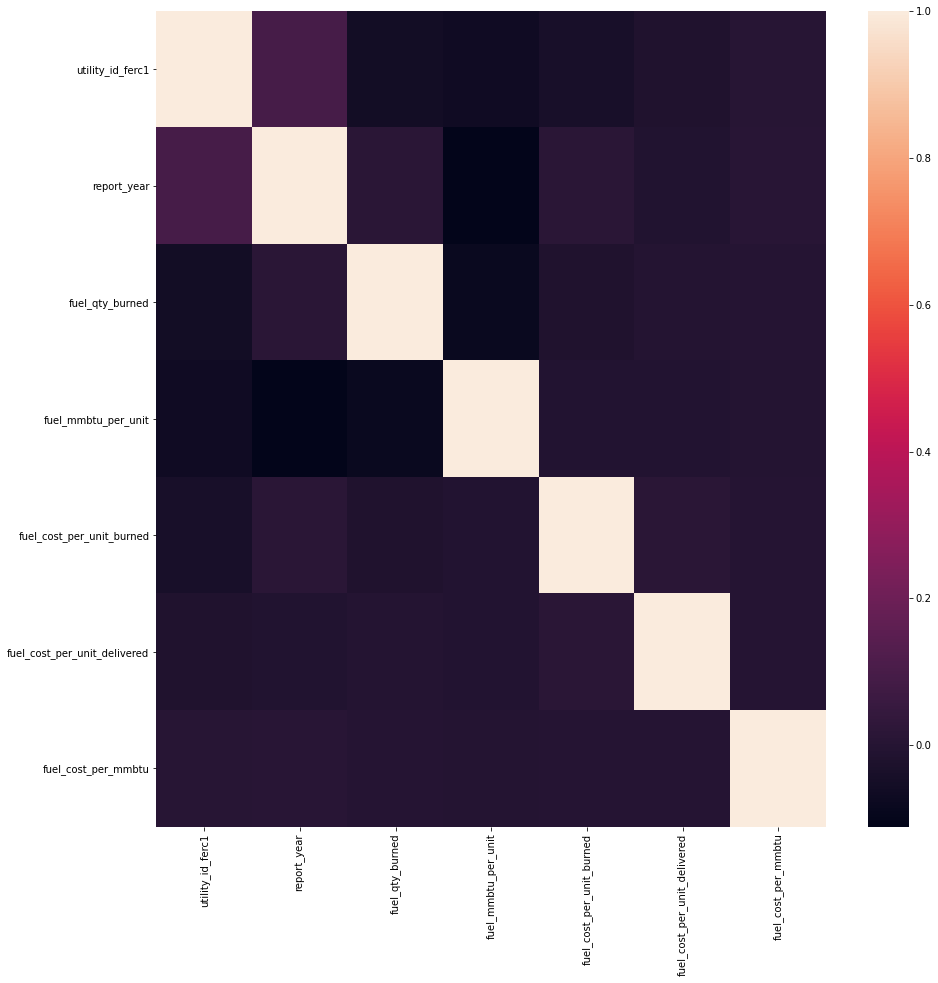

In [13]:
import seaborn as sns
corr=df.corr()
fig , ax =plt.subplots(figsize=(15,15))
sns.heatmap(corr,
            xticklabels=corr.columns,
           yticklabels=corr.columns,
           ax=ax)

In [14]:
report_year=df.report_year.value_counts().to_dict()
rate=((report_year[1998]-report_year[1994])/report_year[1998])*100
print(report_year[1994],'fuel cost per unit burned in  1994 &',report_year[1998],'fuel cost per unit burned in   1998')

1235 fuel cost per unit burned in  1994 & 1107 fuel cost per unit burned in   1998


In [15]:
print('fuel cost per unit burned from 1994 has changed by',rate, '% till 1998')

fuel cost per unit burned from 1994 has changed by -11.562782294489612 % till 1998


Text(0.5, 0, 'YEAR')

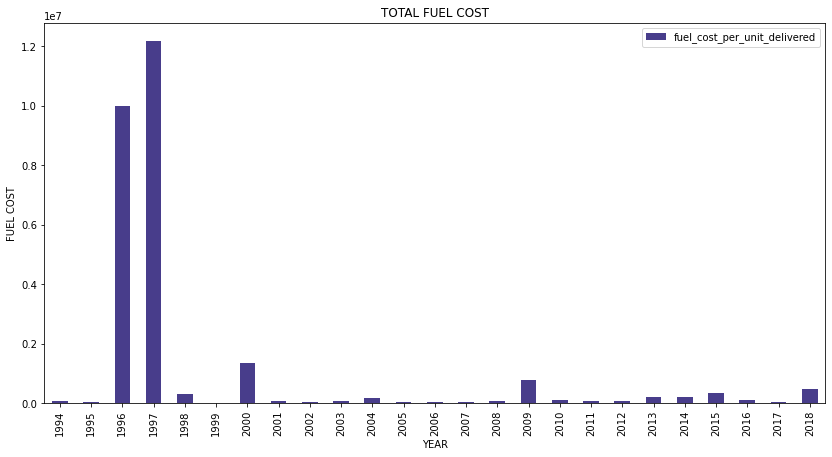

In [16]:
df[['report_year', 'fuel_cost_per_unit_delivered']].groupby(["report_year"],axis=0).sum().plot(kind='bar',figsize=(14,7),color=['darkslateblue', 'mediumseagreen'])
plt.title("TOTAL FUEL COST")
plt.ylabel('FUEL COST')
plt.xlabel('YEAR')

Text(0.5, 0, 'type of fuel ')

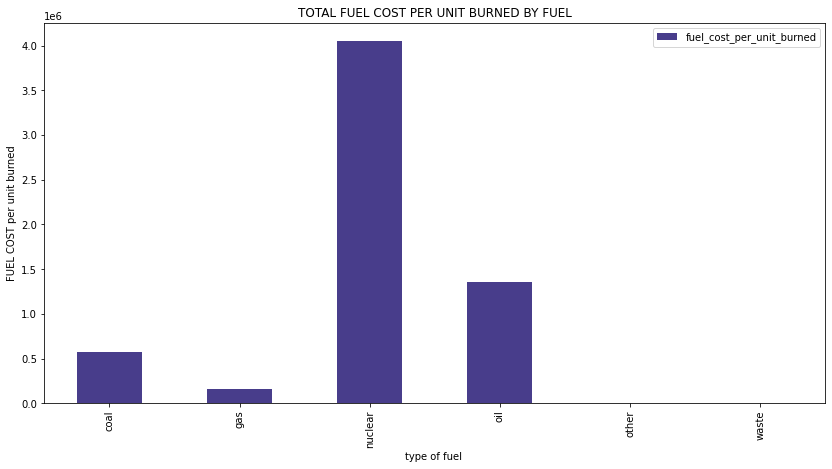

In [17]:
df[['fuel_type_code_pudl', 'fuel_cost_per_unit_burned']].groupby(["fuel_type_code_pudl"],axis=0).sum().plot(kind='bar',figsize=(14,7),color=['darkslateblue', 'mediumseagreen'])
plt.title("TOTAL FUEL COST PER UNIT BURNED BY FUEL")
plt.ylabel('FUEL COST per unit burned')
plt.xlabel('type of fuel ')

C:\Users\Home\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


Text(0.5, 0, 'YEAR ')

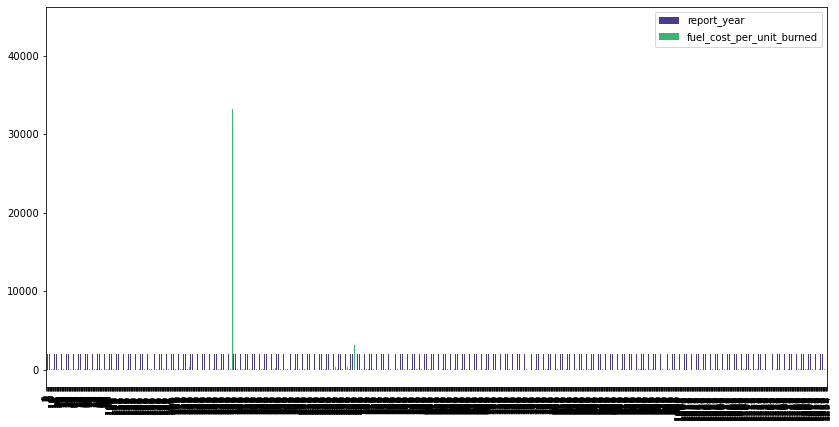

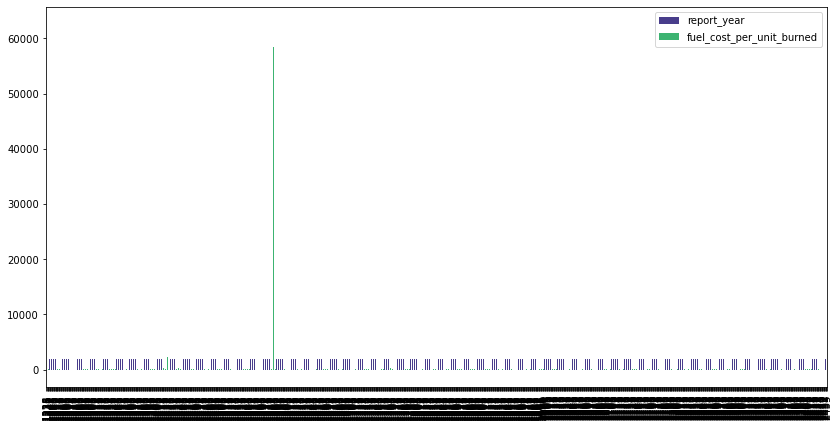

In [ ]:
df[['fuel_type_code_pudl','report_year','fuel_cost_per_unit_burned']].groupby(['report_year'],axis=0).plot(kind='bar',figsize=(14,7),color=['darkslateblue', 'mediumseagreen'])
plt.title("TOTAL FUEL COST PER UNIT BURNED ")
plt.ylabel('FUEL COST per unit burned')
plt.xlabel('YEAR ')